In [ ]:
# モジュールのインポート
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# 今回Dockerを使用する原因を作ったやつ（テクニカル分析のためのライブラリ）
import talib as ta

# ローソク足、出来高、移動平均線、ボリンジャーバンドなどを表示できる便利なライブラリ
import mplfinance as mpf

# warningを消す
import warnings
warnings.simplefilter('ignore')

In [ ]:
start = '2005-01-01'
end = '2022-01-01'

df = data.DataReader('4689.JP', 'stooq', start, end) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4108 entries, 2021-12-30 to 2005-03-22
Data columns (total 5 columns):
Open      4108 non-null float64
High      4108 non-null float64
Low       4108 non-null float64
Close     4108 non-null float64
Volume    4108 non-null int64
dtypes: float64(4), int64(1)
memory usage: 192.6 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-30,646.9,677.0,645.7,667.4,21235600
2021-12-29,644.0,649.6,641.9,645.9,7257200
2021-12-28,649.2,654.6,643.6,644.0,12849300
2021-12-27,656.0,659.5,638.3,640.2,16486400
2021-12-24,663.1,690.1,661.7,663.4,18055500


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2005-03-28,586.38,588.58,557.61,570.88,18962973
2005-03-25,577.54,583.05,573.09,580.85,37678290
2005-03-24,570.88,571.98,566.47,568.68,15077282
2005-03-23,568.68,573.09,565.36,569.77,15162243
2005-03-22,567.57,575.31,566.47,567.57,14303578


In [ ]:
date=df.index
close = df['Close']

# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df['sma25'] = close.rolling(window=span25).mean()
df['sma50'] = close.rolling(window=span50).mean()

# MACD（トレンドの指標を見る）
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI（売られすぎ・買われすぎの判断材料）
df['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

# candle
df_candle = df[['High', 'Low', 'Open', 'Close', 'Volume']]

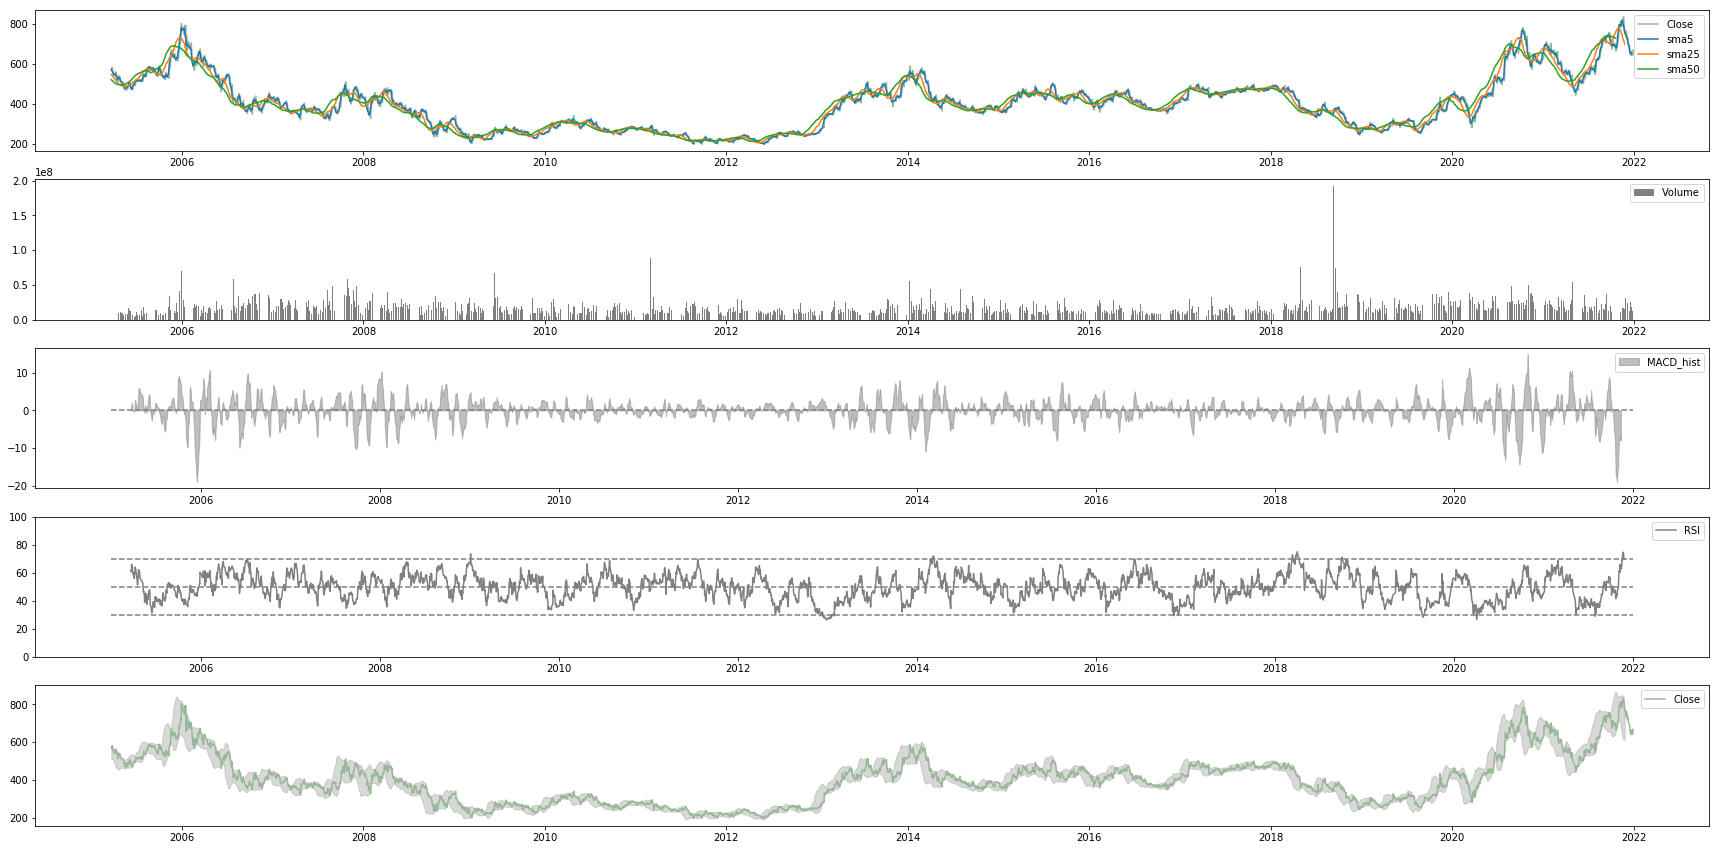

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
plt.hlines(0, start, end, "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], start, end, 'grey', linestyles='dashed')
plt.legend()


# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date, close, label = 'Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='grey', alpha=0.3)
plt.legend()

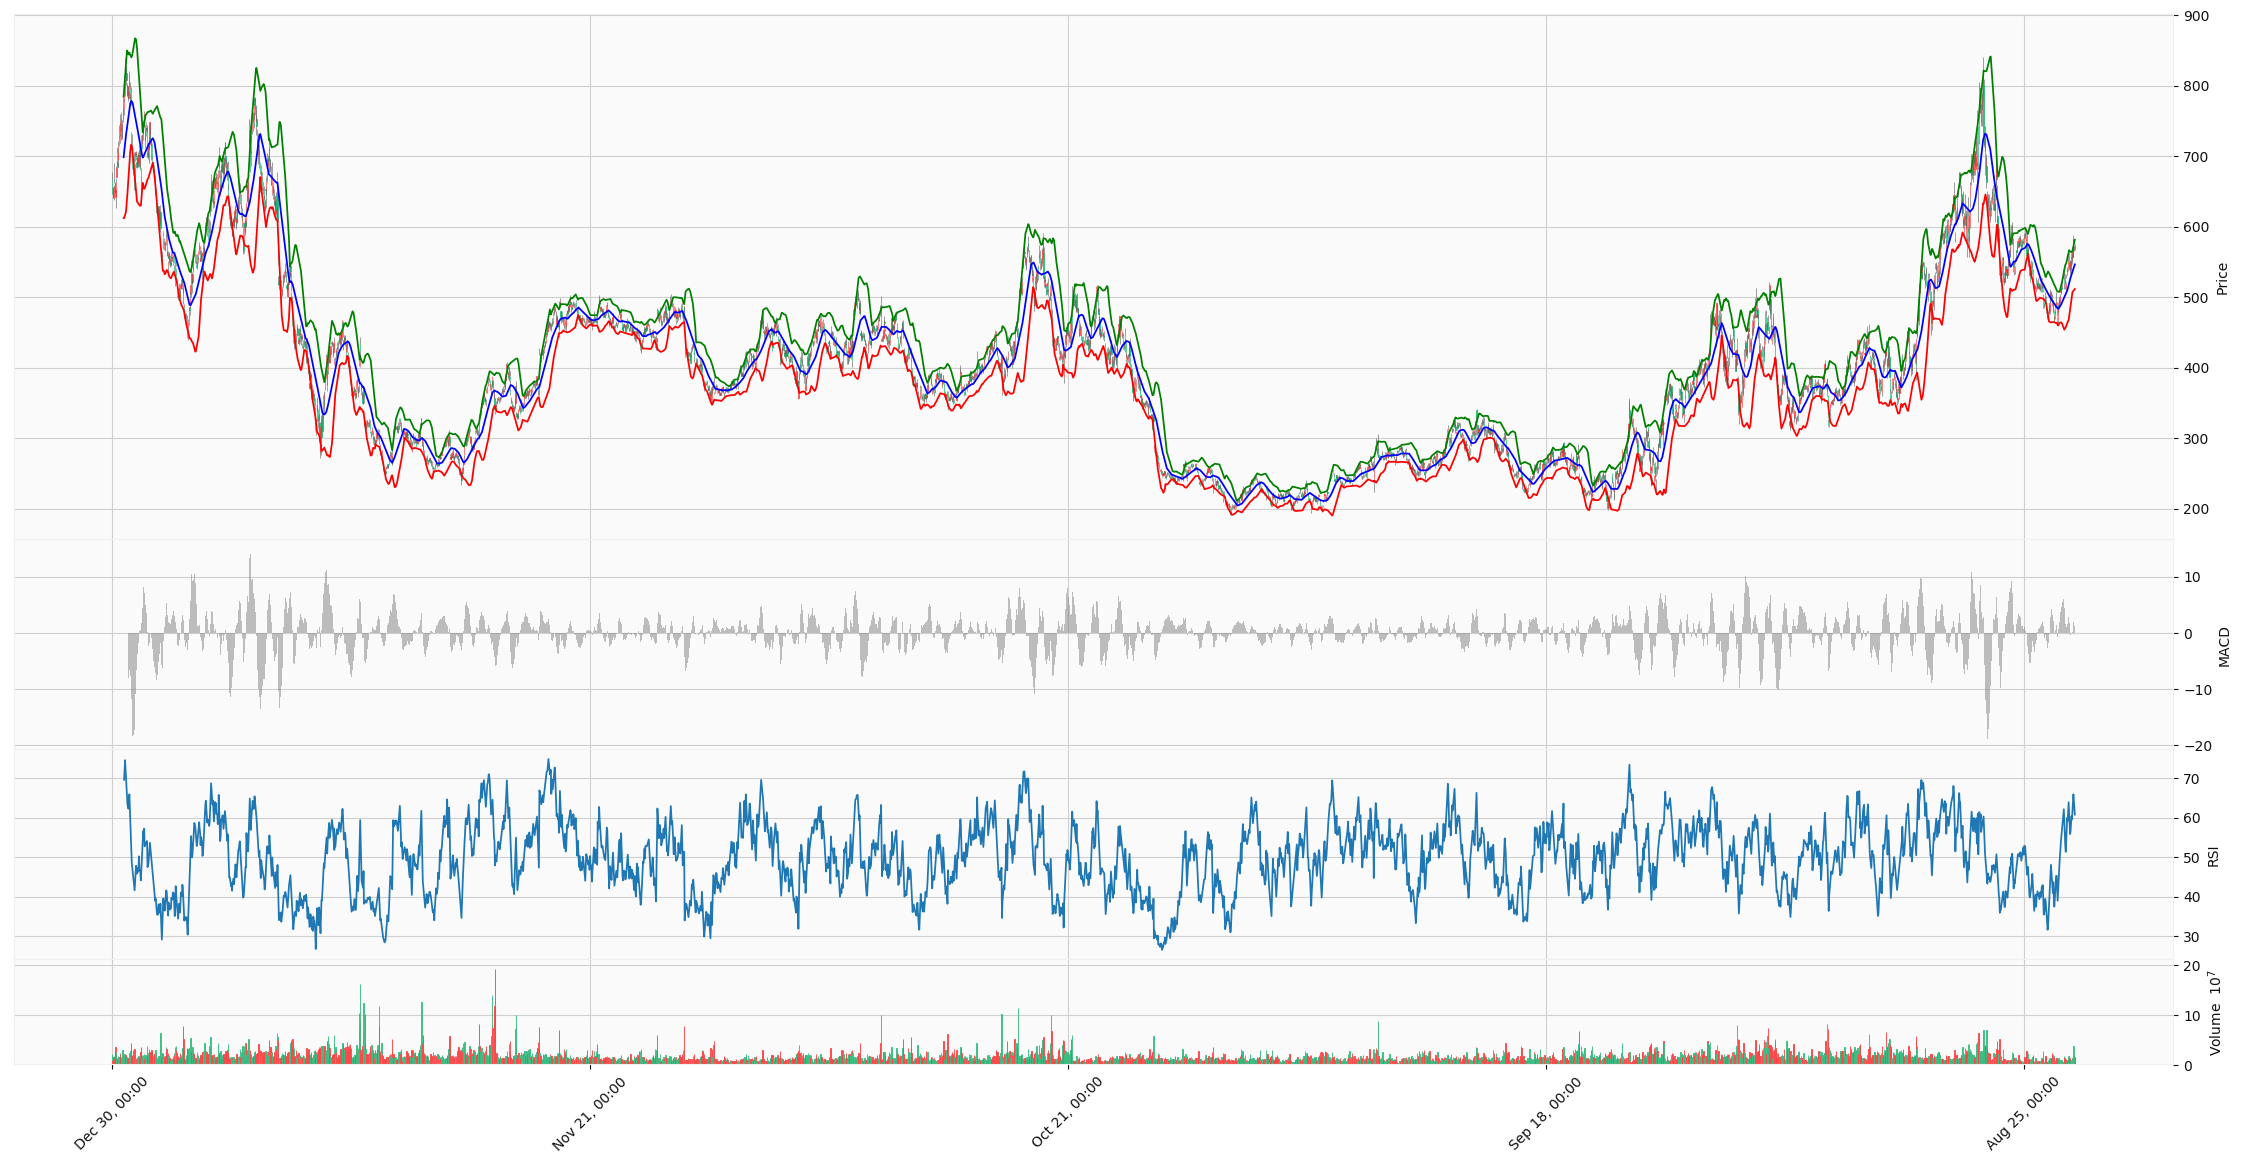

In [ ]:
apds = [mpf.make_addplot(df['upper'], color='g'),
        mpf.make_addplot(df['middle'], color='b'),
        mpf.make_addplot(df['lower'], color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [ ]:
df.index.min()

Timestamp('2005-03-22 00:00:00')

In [ ]:
df.index.max()

Timestamp('2021-12-30 00:00:00')

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2005-03-28,586.38,588.58,557.61,570.88,18962973,557.166,538.8452,514.0608,12.834176,11.896647,0.937529,63.824273,569.331178,538.8452,508.359222
2005-03-25,577.54,583.05,573.09,580.85,37678290,563.584,541.5452,516.0746,14.316913,12.380700,1.936213,65.945413,574.386310,541.5452,508.704090
2005-03-24,570.88,571.98,566.47,568.68,15077282,566.240,543.4924,517.5352,14.344620,12.773484,1.571136,61.369981,576.762634,543.4924,510.222166
2005-03-23,568.68,573.09,565.36,569.77,15162243,569.558,545.1296,518.8406,14.289807,13.076749,1.213058,61.618429,579.368728,545.1296,510.890472
2005-03-22,567.57,575.31,566.47,567.57,14303578,571.550,546.5020,520.0578,13.908517,13.243102,0.665415,60.796352,581.470749,546.5020,511.533251


In [ ]:
df = df.sort_index()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2005-03-22,567.57,575.31,566.47,567.57,14303578,571.550,546.5020,520.0578,13.908517,13.243102,0.665415,60.796352,581.470749,546.5020,511.533251
2005-03-23,568.68,573.09,565.36,569.77,15162243,569.558,545.1296,518.8406,14.289807,13.076749,1.213058,61.618429,579.368728,545.1296,510.890472
2005-03-24,570.88,571.98,566.47,568.68,15077282,566.240,543.4924,517.5352,14.344620,12.773484,1.571136,61.369981,576.762634,543.4924,510.222166
2005-03-25,577.54,583.05,573.09,580.85,37678290,563.584,541.5452,516.0746,14.316913,12.380700,1.936213,65.945413,574.386310,541.5452,508.704090
2005-03-28,586.38,588.58,557.61,570.88,18962973,557.166,538.8452,514.0608,12.834176,11.896647,0.937529,63.824273,569.331178,538.8452,508.359222


In [ ]:
df[(df.index>='2021-01-01 00:00:00') & (df.index<='2022-01-01 00:00:00')]

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2021-01-04,624.28,636.36,618.54,630.52,15485889,665.454,676.6696,653.8672,2.601887,10.492997,-7.891110,46.645614,716.011059,676.6696,637.328141
2021-01-05,633.69,660.03,630.42,652.60,26494433,676.444,678.0796,653.1682,7.065996,12.465774,-5.399778,50.155706,712.980037,678.0796,643.179163
2021-01-06,653.00,693.30,652.60,683.20,40851896,684.128,678.2420,651.6236,10.412898,13.815719,-3.402820,55.735715,712.701677,678.2420,643.782323
2021-01-07,680.03,691.81,666.36,672.90,29841939,687.474,677.6476,649.1760,11.417667,14.666424,-3.248757,54.085063,712.257005,677.6476,643.038195
2021-01-08,674.48,688.54,671.71,688.05,20671721,694.960,677.1368,646.9244,13.582768,15.478613,-1.895845,57.091267,712.382502,677.1368,641.891098
2021-01-12,690.33,696.46,683.00,685.47,26323548,695.970,676.2576,644.0252,14.606112,15.952574,-1.346462,56.697780,711.467083,676.2576,641.048117
2021-01-13,683.49,691.61,675.28,691.02,15333285,698.248,675.0496,641.1400,15.962510,16.289190,-0.326680,57.792235,710.976866,675.0496,639.122334
2021-01-14,690.72,719.44,684.48,699.93,26870238,695.158,672.7208,638.4072,16.896494,16.370859,0.525634,59.564276,711.629298,672.7208,633.812302
2021-01-15,712.31,720.03,703.00,710.33,21035306,691.672,670.1584,635.5754,16.935629,16.239451,0.696179,61.683617,709.988416,670.1584,630.328384


In [ ]:
df2 = df[(df.index>='2021-01-01 00:00:00') & (df.index<='2022-01-01 00:00:00')]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-01-04 to 2021-12-30
Data columns (total 15 columns):
Open          245 non-null float64
High          245 non-null float64
Low           245 non-null float64
Close         245 non-null float64
Volume        245 non-null int64
sma5          241 non-null float64
sma25         221 non-null float64
sma50         196 non-null float64
macd          212 non-null float64
macdsignal    212 non-null float64
macdhist      212 non-null float64
RSI           220 non-null float64
upper         221 non-null float64
middle        221 non-null float64
lower         221 non-null float64
dtypes: float64(14), int64(1)
memory usage: 30.6 KB


In [ ]:
date2=df2.index
close = df2['Close']

# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df2['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df2['sma25'] = close.rolling(window=span25).mean()
df2['sma50'] = close.rolling(window=span50).mean()

# MACD（トレンドの指標を見る）
df2['macd'], df2['macdsignal'], df2['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI（売られすぎ・買われすぎの判断材料）
df2['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df2['upper'], df2['middle'], df2['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

# candle
df2_candle = df2[['High', 'Low', 'Open', 'Close', 'Volume']]

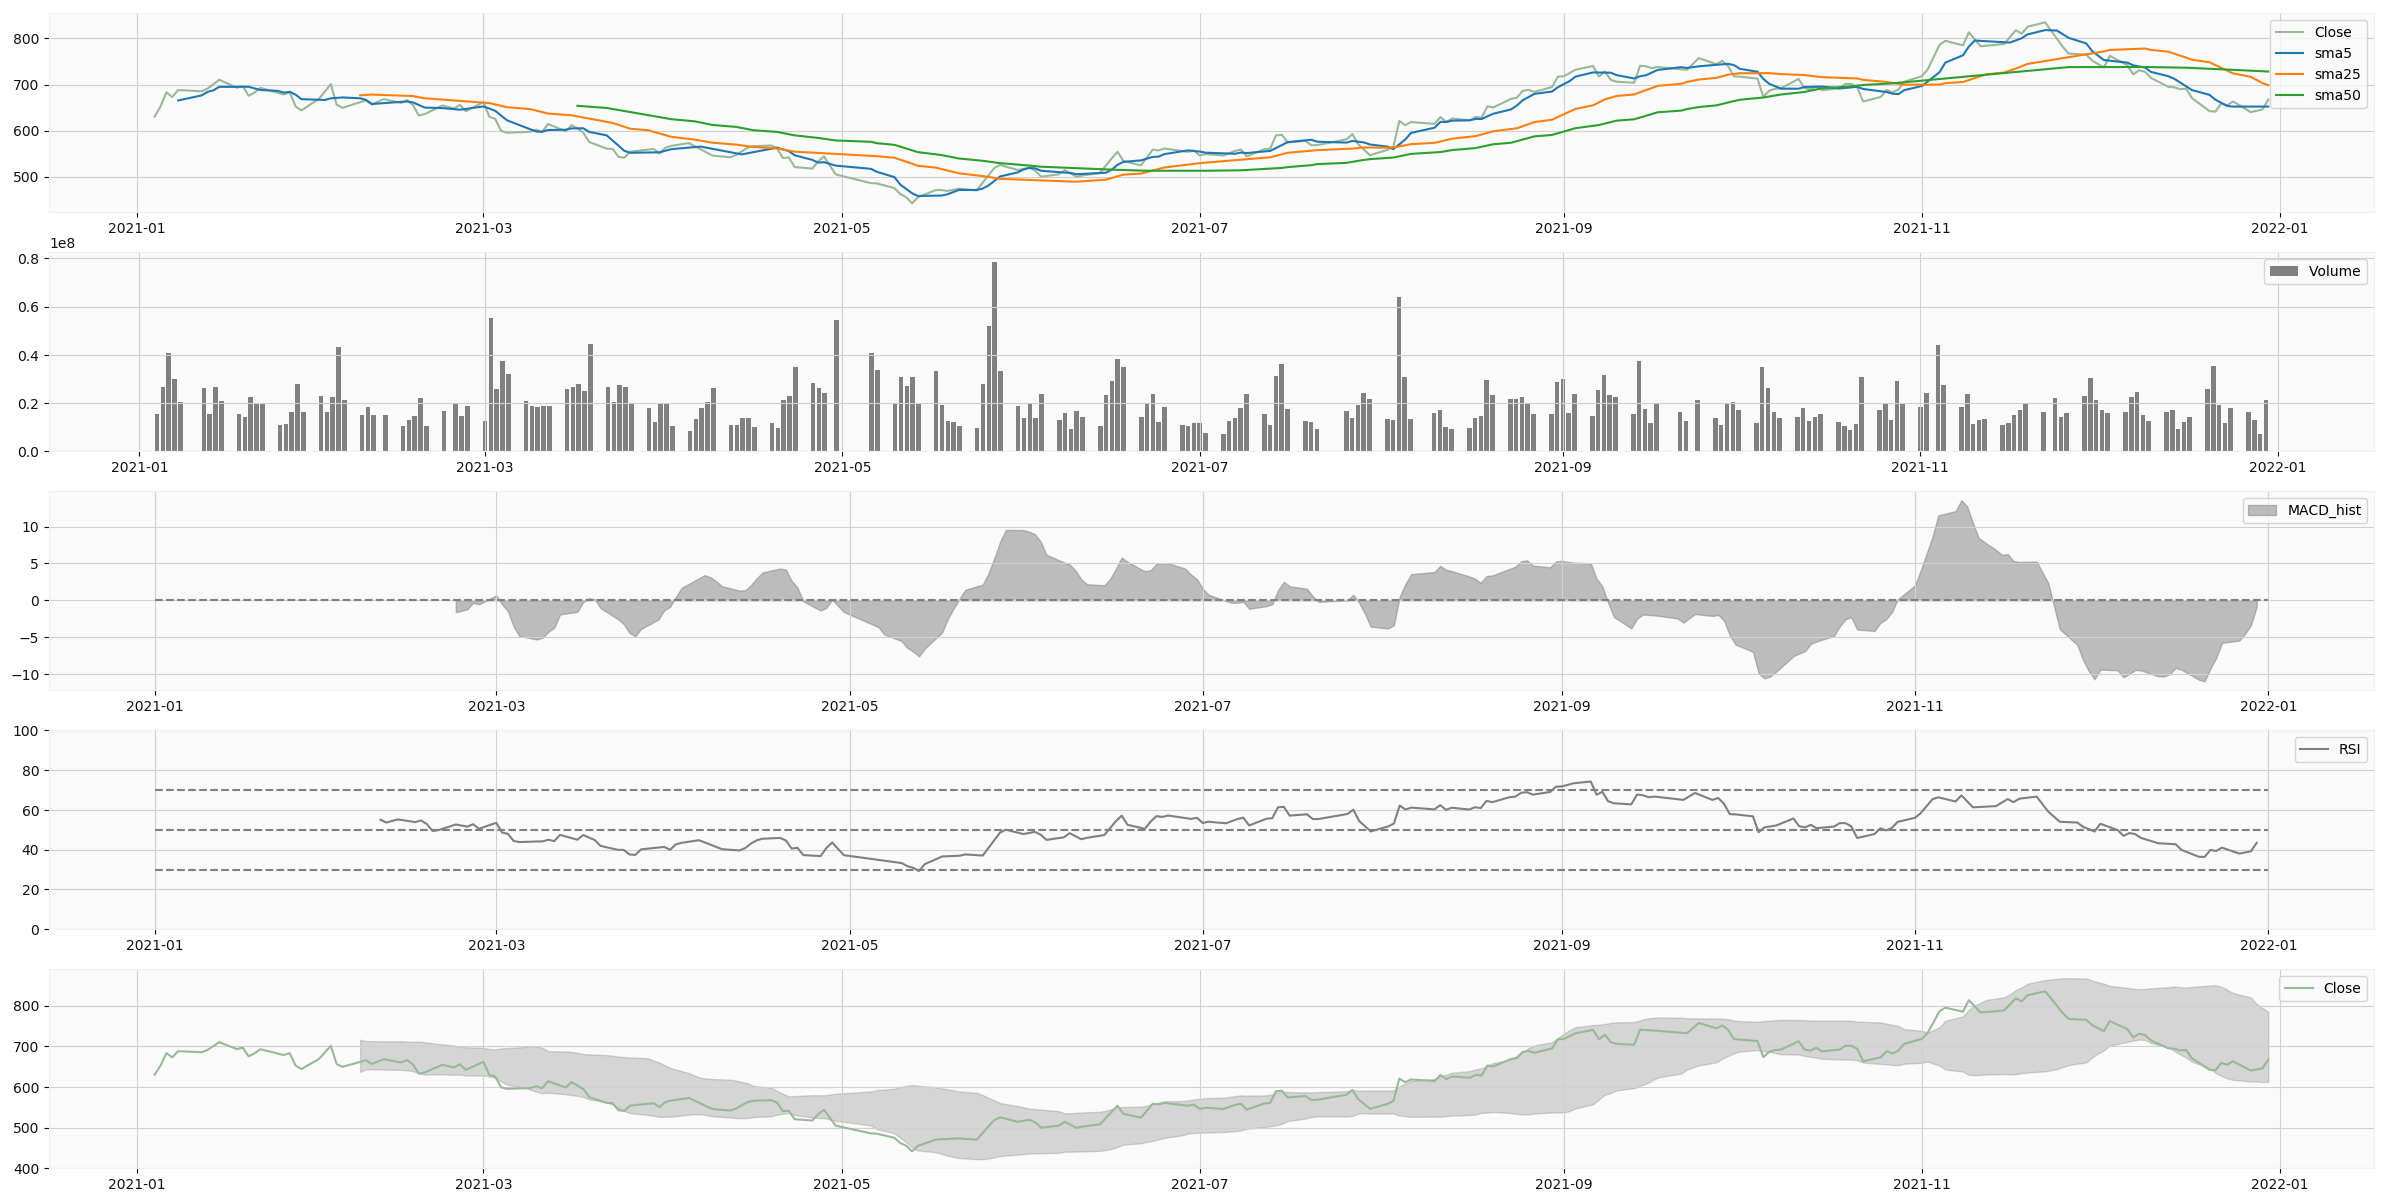

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date2,close,label='Close',color='#99b898')
plt.plot(date2,df2['sma5'],label='sma5')
plt.plot(date2,df2['sma25'],label='sma25')
plt.plot(date2,df2['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date2,df2['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date2, df2['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
plt.hlines(0, '2021-01-01', '2022-01-01', "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date2,df2['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], '2021-01-01', '2022-01-01', 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date2, close, label = 'Close', color='#99b898')
plt.fill_between(date2, df2['upper'], df2['lower'], color='grey', alpha=0.3)
plt.legend()

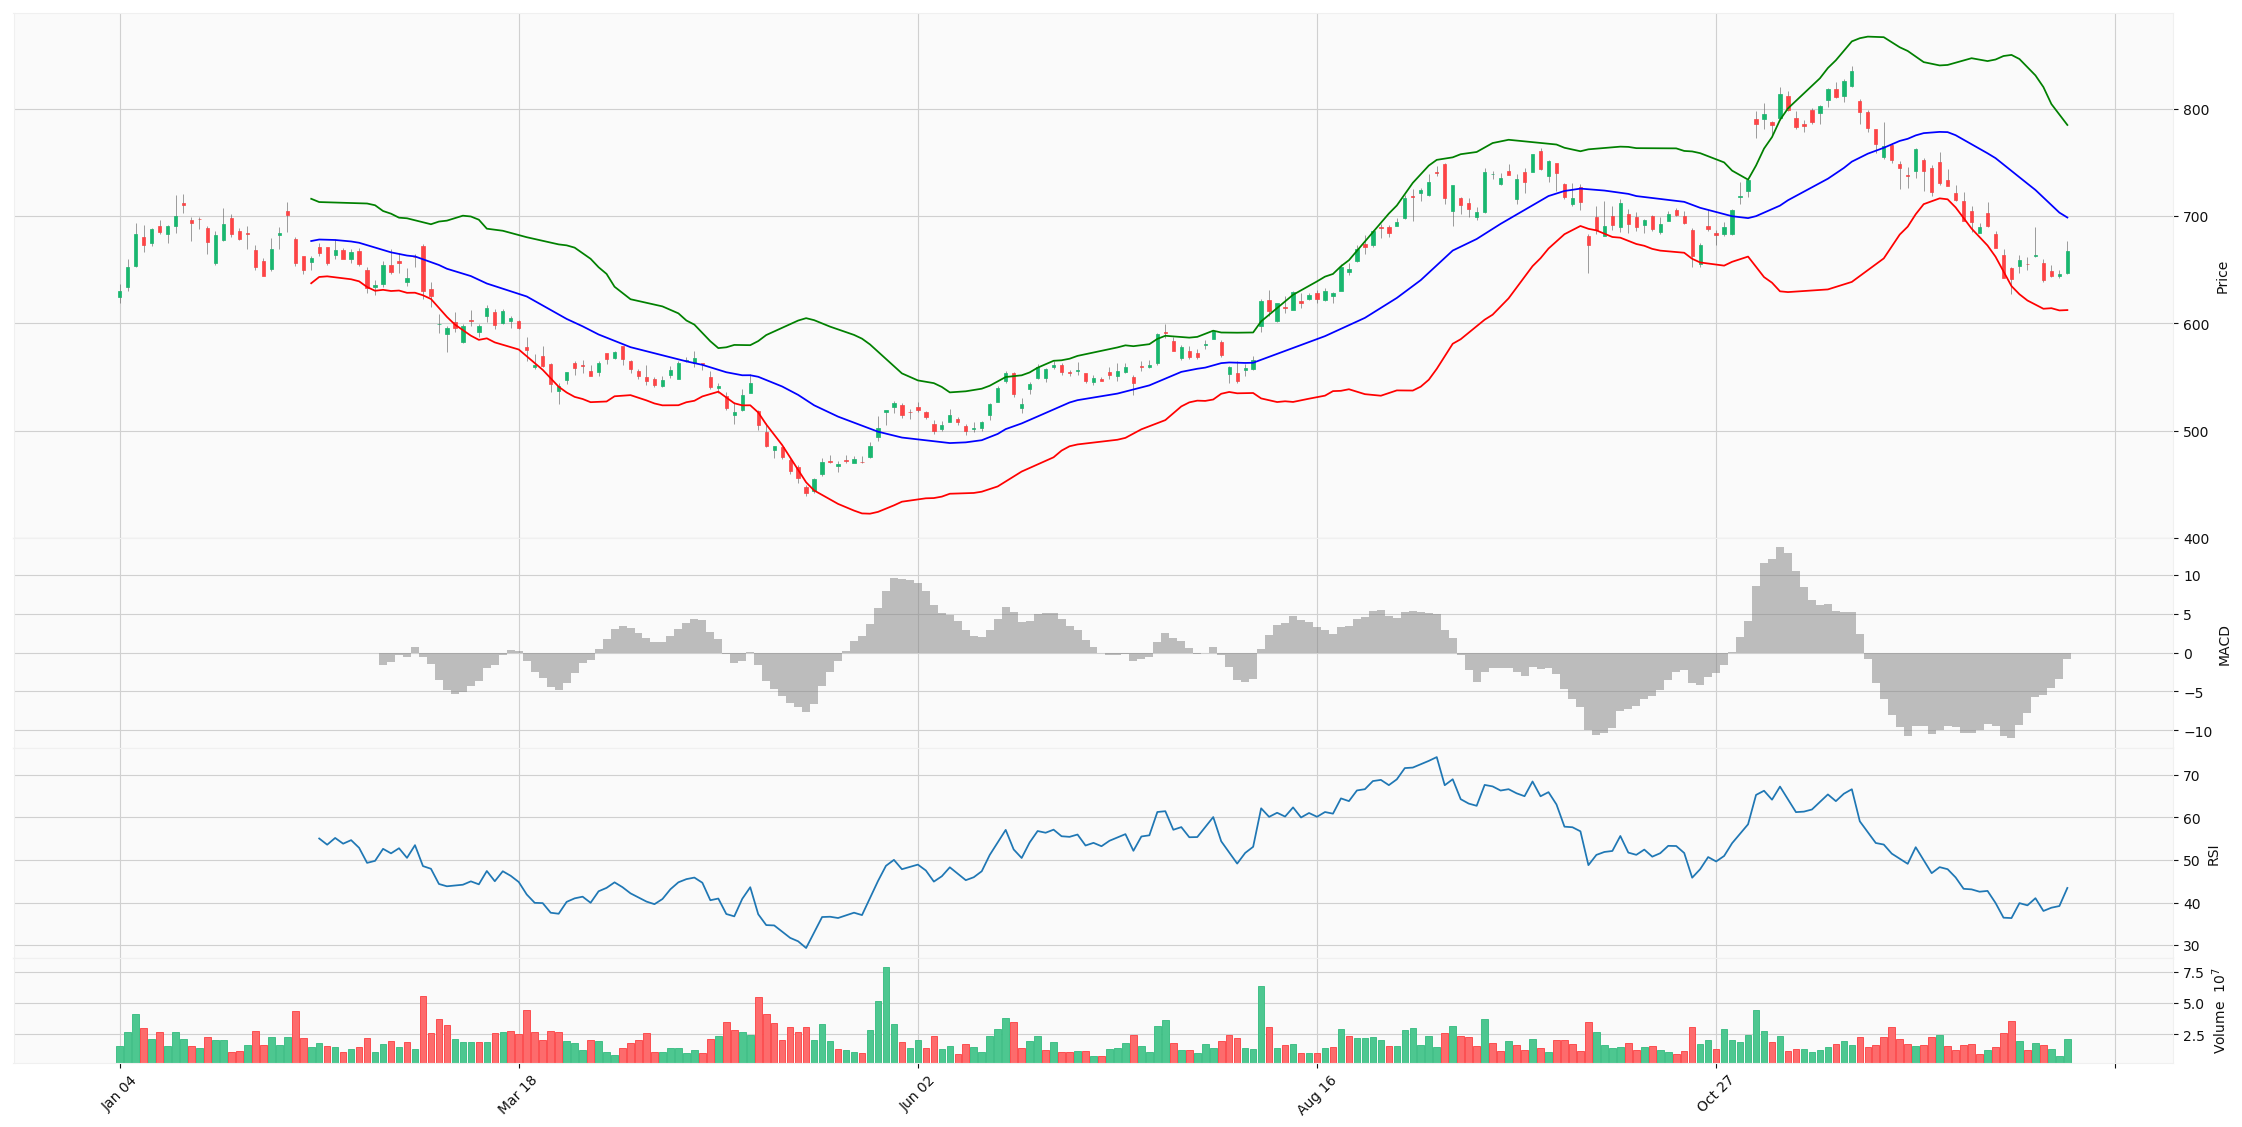

In [ ]:
apds = [mpf.make_addplot(df2['upper'], color='g'),
        mpf.make_addplot(df2['middle'], color='b'),
        mpf.make_addplot(df2['lower'], color='r'),
        mpf.make_addplot(df2['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df2['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df2, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [ ]:
high =df2['High']
low = df2['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()

df2['basic_line'] = (max26 + min26) / 2

In [ ]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line
Date,,,,,,,,,,,,,,,,
2021-12-24,663.1,690.1,661.7,663.4,18055500,652.18,724.240,731.900,-27.386996,-21.608790,-5.778206,41.015431,830.969550,724.240,617.510450,733.35
2021-12-27,656.0,659.5,638.3,640.2,16486400,651.78,716.828,730.778,-28.449033,-22.976838,-5.472195,38.011575,820.079670,716.828,613.576330,733.35
2021-12-28,649.2,654.6,643.6,644.0,12849300,652.30,709.188,729.904,-28.653774,-24.112226,-4.541548,38.776597,804.275939,709.188,614.100061,733.35
2021-12-29,644.0,649.6,641.9,645.9,7257200,649.68,703.144,728.980,-28.336078,-24.956996,-3.379082,39.167615,794.263176,703.144,612.024824,718.05
2021-12-30,646.9,677.0,645.7,667.4,21235600,652.18,698.568,728.298,-26.049153,-25.175427,-0.873725,43.426590,784.785654,698.568,612.350346,712.95


In [ ]:
# 転換線
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()

df2['turn_line'] = (high9 + low9) / 2

In [ ]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line
Date,,,,,,,,,,,,,,,,,
2021-12-24,663.1,690.1,661.7,663.4,18055500,652.18,724.240,731.900,-27.386996,-21.608790,-5.778206,41.015431,830.969550,724.240,617.510450,733.35,670.15
2021-12-27,656.0,659.5,638.3,640.2,16486400,651.78,716.828,730.778,-28.449033,-22.976838,-5.472195,38.011575,820.079670,716.828,613.576330,733.35,670.15
2021-12-28,649.2,654.6,643.6,644.0,12849300,652.30,709.188,729.904,-28.653774,-24.112226,-4.541548,38.776597,804.275939,709.188,614.100061,733.35,670.15
2021-12-29,644.0,649.6,641.9,645.9,7257200,649.68,703.144,728.980,-28.336078,-24.956996,-3.379082,39.167615,794.263176,703.144,612.024824,718.05,658.60
2021-12-30,646.9,677.0,645.7,667.4,21235600,652.18,698.568,728.298,-26.049153,-25.175427,-0.873725,43.426590,784.785654,698.568,612.350346,712.95,658.60


In [ ]:
# 先行スパン1
df2['sspan1'] = (df2['basic_line'] + df2['turn_line']) / 2

In [ ]:
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df2['sspan2'] = (high52 + low52) / 2

In [ ]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line,sspan1,sspan2
Date,,,,,,,,,,,,,,,,,,,
2021-12-24,663.1,690.1,661.7,663.4,18055500,652.18,724.240,731.900,-27.386996,-21.608790,-5.778206,41.015431,830.969550,724.240,617.510450,733.35,670.15,701.750,733.35
2021-12-27,656.0,659.5,638.3,640.2,16486400,651.78,716.828,730.778,-28.449033,-22.976838,-5.472195,38.011575,820.079670,716.828,613.576330,733.35,670.15,701.750,733.35
2021-12-28,649.2,654.6,643.6,644.0,12849300,652.30,709.188,729.904,-28.653774,-24.112226,-4.541548,38.776597,804.275939,709.188,614.100061,733.35,670.15,701.750,733.35
2021-12-29,644.0,649.6,641.9,645.9,7257200,649.68,703.144,728.980,-28.336078,-24.956996,-3.379082,39.167615,794.263176,703.144,612.024824,718.05,658.60,688.325,733.35
2021-12-30,646.9,677.0,645.7,667.4,21235600,652.18,698.568,728.298,-26.049153,-25.175427,-0.873725,43.426590,784.785654,698.568,612.350346,712.95,658.60,685.775,733.35


In [ ]:
df2['slow_line'] = df2['Close'].shift(-25)

In [ ]:
df2.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line,sspan1,sspan2,slow_line
Date,,,,,,,,,,,,,,,,,,,,
2021-01-04,624.28,636.36,618.54,630.52,15485889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665.77
2021-01-05,633.69,660.03,630.42,652.60,26494433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656.66
2021-01-06,653.00,693.30,652.60,683.20,40851896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,668.34
2021-01-07,680.03,691.81,666.36,672.90,29841939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.13
2021-01-08,674.48,688.54,671.71,688.05,20671721,665.454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,666.07


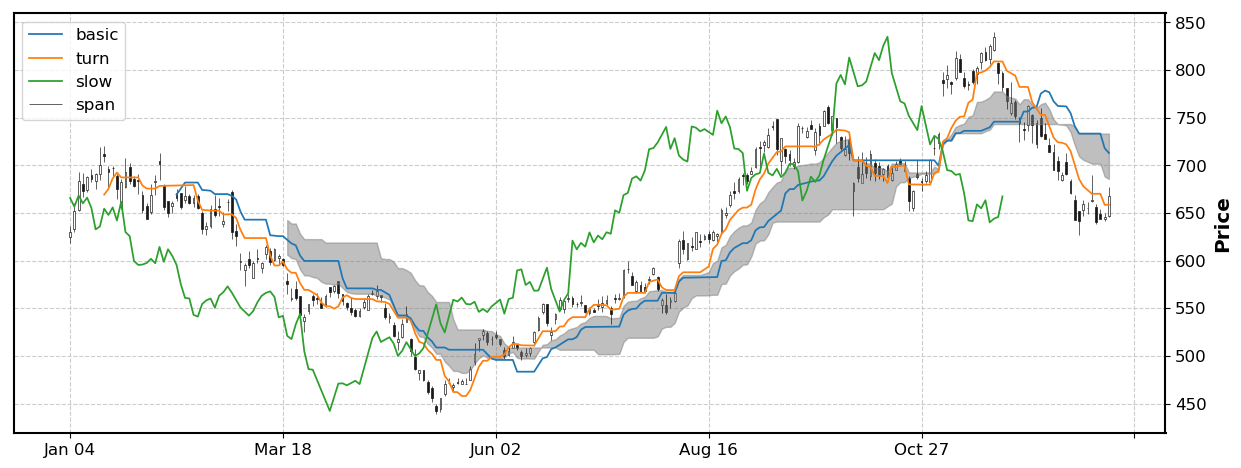

In [ ]:
lines = [mpf.make_addplot(df2['basic_line']), # 基準線
         mpf.make_addplot(df2['turn_line']), # 転換線
         mpf.make_addplot(df2['slow_line']), # 遅行線 
        ]

labels = ['basic', 'turn', 'slow', 'span']
fig, ax = mpf.plot(df2, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                   fill_between=dict(y1=df2['sspan1'].values, y2=df2['sspan2'].values, alpha=0.5, color='gray'))
ax[0].legend(labels)
plt.show()